In [1]:
#Gender, Age, Annual Income and Spending Score

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df = pd.read_csv("Mall_Customers - Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39
1,2,Male,21.0,15.0,81
2,3,Female,20.0,16.0,6
3,4,Female,23.0,16.0,77
4,5,Female,31.0,17.0,40
...,...,...,...,...,...
198,199,Male,32.0,137.0,18
199,200,Male,30.0,137.0,83
200,201,Female,27.0,NaN,28
201,202,Male,NaN,137.0,19


In [3]:
df.isnull().value_counts()

#3 null values one in Annual one in Age one in gender

CustomerID  Gender  Age    Annual Income (k$)  Spending Score (1-100)
False       False   False  False               False                     200
                           True                False                       1
                    True   False               False                       1
            True    False  False               False                       1
Name: count, dtype: int64

In [4]:
numerical_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for col in numerical_columns:
    df[col].fillna(df[col].mean(), inplace=True)

categorical_columns = ['CustomerID', 'Gender']
for col in categorical_columns:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)


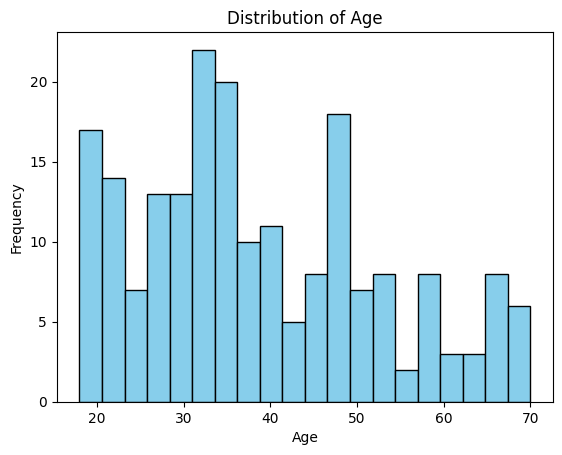

count    203.000000
mean      38.747525
std       13.903508
min       18.000000
25%       28.500000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64


In [5]:
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

age_stats = df['Age'].describe()
print(age_stats)

In [6]:
numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

spending_score_corr = correlation_matrix['Spending Score (1-100)']

spending_score_corr = spending_score_corr.drop('Spending Score (1-100)')

highest_corr_feature = spending_score_corr.idxmax()
highest_corr_value = spending_score_corr.max()

print(f"The feature with the highest correlation with 'Spending Score (1-100)' is '{highest_corr_feature}' with a correlation coefficient of {highest_corr_value}.")


The feature with the highest correlation with 'Spending Score (1-100)' is 'Annual Income (k$)' with a correlation coefficient of 0.010273914343130205.


C:\Users\DURRANI\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DURRANI\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DURRANI\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DURRANI\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: 

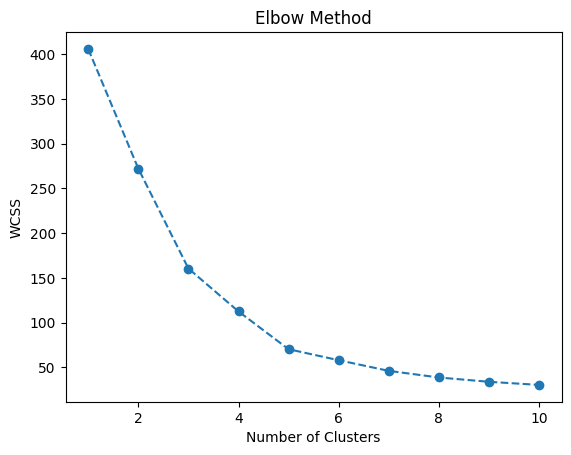

In [7]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [8]:

average_annual_income = df['Annual Income (k$)'].mean()

print(f"The average annual income of customers in the dataset is ${average_annual_income:.2f}k.")


The average annual income of customers in the dataset is $61.32k.


In [9]:

male_customers = df[df['Gender'] == 'Male']

average_spending_score_male = male_customers['Spending Score (1-100)'].mean()

print(f"The average spending score of male customers in the dataset is {average_spending_score_male:.2f}.")


The average spending score of male customers in the dataset is 48.18.


In [10]:



kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)  
df['Cluster'] = clusters

cluster_stats = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()

highest_avg_income_cluster = cluster_stats['Annual Income (k$)'].idxmax()
highest_avg_spending_score_cluster = cluster_stats['Spending Score (1-100)'].idxmax()

print(f"The cluster with the highest average income is Cluster {highest_avg_income_cluster}.")
print(f"The cluster with the highest average spending score is Cluster {highest_avg_spending_score_cluster}.")


The cluster with the highest average income is Cluster 1.
The cluster with the highest average spending score is Cluster 3.


C:\Users\DURRANI\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [11]:
cluster_1_count = (df['Cluster'] == 1).sum()

total_customers = len(df)

percentage_cluster_1 = (cluster_1_count / total_customers) * 100

print(f"The percentage of customers in Cluster 1 is {percentage_cluster_1:.2f}%.")


The percentage of customers in Cluster 1 is 17.73%.


In [12]:
cluster_2_data = df[df['Cluster'] == 2]

most_frequent_age_group = cluster_2_data['Age'].mode()[0]

print(f"The most frequent age group in Cluster 2 is {most_frequent_age_group}.")


The most frequent age group in Cluster 2 is 35.0.


In [13]:
cluster_3_data = df[df['Cluster'] == 3]

average_income_cluster_3 = cluster_3_data['Annual Income (k$)'].mean()

print(f"The average income of customers in Cluster 3 is ${average_income_cluster_3:.2f}k.")


The average income of customers in Cluster 3 is $87.80k.


In [14]:
cluster_counts = df['Cluster'].value_counts()

print("Count of values in each cluster:")
print(cluster_counts)


Count of values in each cluster:
Cluster
0    82
3    40
1    36
2    23
4    22
Name: count, dtype: int64


In [15]:
for cluster_label in df['Cluster'].unique():
    print(f"Customers in Cluster {cluster_label}:")
    cluster_customers = df[df['Cluster'] == cluster_label]
    print(cluster_customers)
    print()


Customers in Cluster 2:
    CustomerID  Gender   Age  Annual Income (k$)  Spending Score (1-100)  \
0            1    Male  19.0                15.0                      39   
2            3  Female  20.0                16.0                       6   
4            5  Female  31.0                17.0                      40   
6            7  Female  35.0                18.0                       6   
8            9    Male  64.0                19.0                       3   
10          11    Male  67.0                19.0                      14   
12          13  Female  58.0                20.0                      15   
14          15    Male  37.0                20.0                      13   
16          17  Female  35.0                21.0                      35   
18          19    Male  52.0                23.0                      29   
20          21    Male  35.0                24.0                      35   
22          23  Female  46.0                25.0                

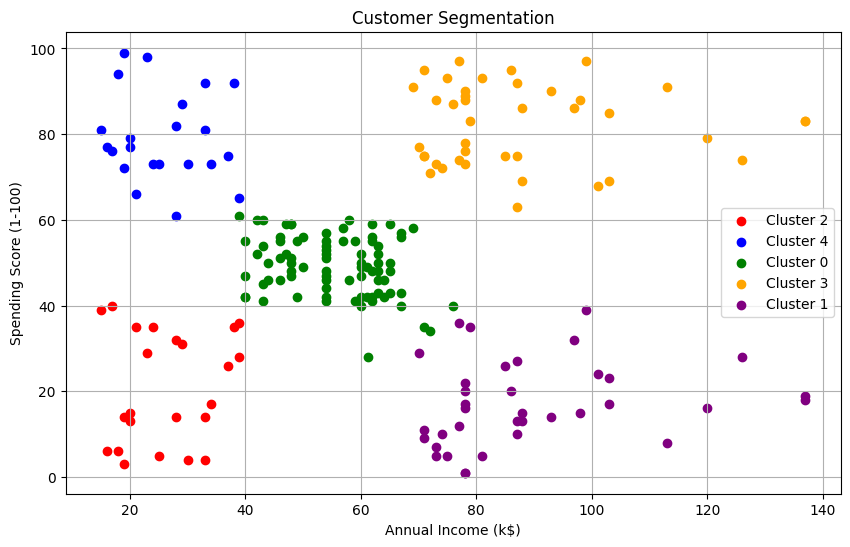

In [16]:
plt.figure(figsize=(10, 6))

colors = ['red', 'blue', 'green', 'orange', 'purple'] 
for cluster_label, color in zip(df['Cluster'].unique(), colors):
    cluster_data = df[df['Cluster'] == cluster_label]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                color=color, label=f'Cluster {cluster_label}')

plt.title('Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()
